# Problem Statement

 A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

# Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# we have to follow the given steps to solve this question

## Reading and understanding data
### Dropping irrelevant columns
## EDA and Visualising the Data
### Creating dummy variables
### Splitting the data
### Rescaling the Features
## Dividing into X and Y sets for the model building
### RFE and statsmodel method combined for optimum final model
## Building model using statsmodel, for the detailed statistics
## Residual Analysis of the train data
## Making Predictions Using the Final Model
## Model Evaluation
### R-Squared value Test
### Adjusted R-Squared value Test
### Final model equation


 Importing required libraries and warnings

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
%matplotlib inline


# Reading and understanding data

In [2]:
bikesharing=pd.read_csv('day.csv')

In [3]:
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bikesharing.shape

(730, 16)

In [5]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bikesharing.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
bikesharing.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
unique,NaN,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,01-01-2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,365.500000,NaN,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,NaN,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,NaN,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000


## Insights :
* The given dataset has 730 rowns and 16 columns.
* Except 'dteday' whose dtype is object (contains date type info), all other are either float or integer type.
* No null/missing values found in the dataset
* Some columns that are categorical in nature, but in integer/float type.

## Dropping irrelevant columns

In [8]:
# instant columns contains index values only, not needed
bikesharing.drop(['instant'],axis=1,inplace=True)

In [9]:
# we already have yr and month columns, so dteday is not needed
bikesharing.drop(['dteday'],axis=1,inplace=True)

In [10]:
# our target variable is cnt, hence we can delete casual and registered columns
bikesharing.drop(['casual','registered'],axis=1,inplace=True)

In [11]:
# checking of the dataset
bikesharing.shape

(730, 12)

In [12]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


# EDA and Visualising the Data

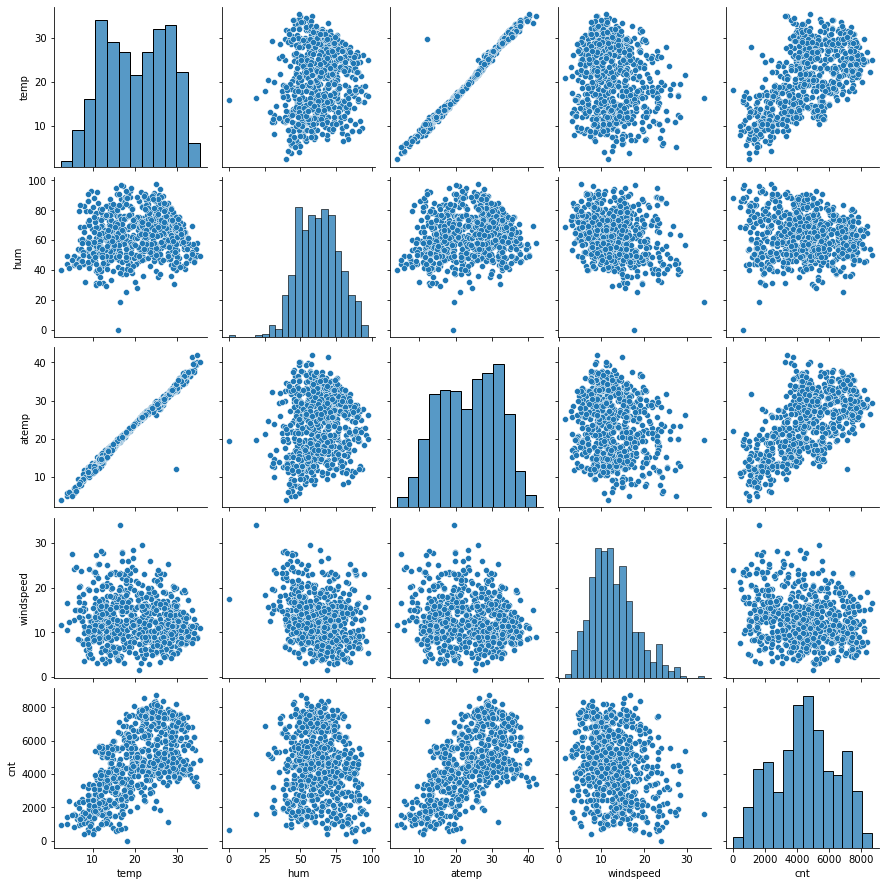

In [13]:
# pairplot of numerical variable
sns.pairplot(bikesharing, vars=['temp','hum','atemp','windspeed',"cnt"])
plt.show()

## Insights:
* There is linear relationship between temp and atemp.
* There is some positive linear trend between temp-cnt and atemp-cnt

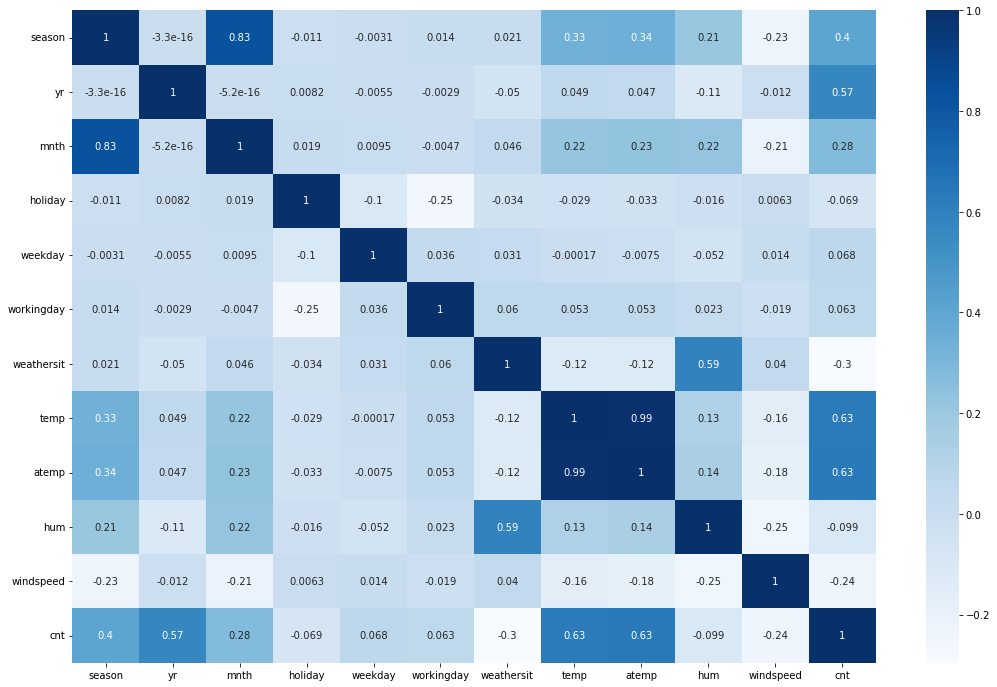

In [14]:
# Correlation between variables
plt.figure(figsize = (18, 12))
sns.heatmap(bikesharing.corr(), annot = True, cmap="Blues")
plt.show()

## Insights:
* There is a correlation of 0.99 between temp and atemp
* There is a correlation of 0.63 between cnt-temp and cnt-atemp

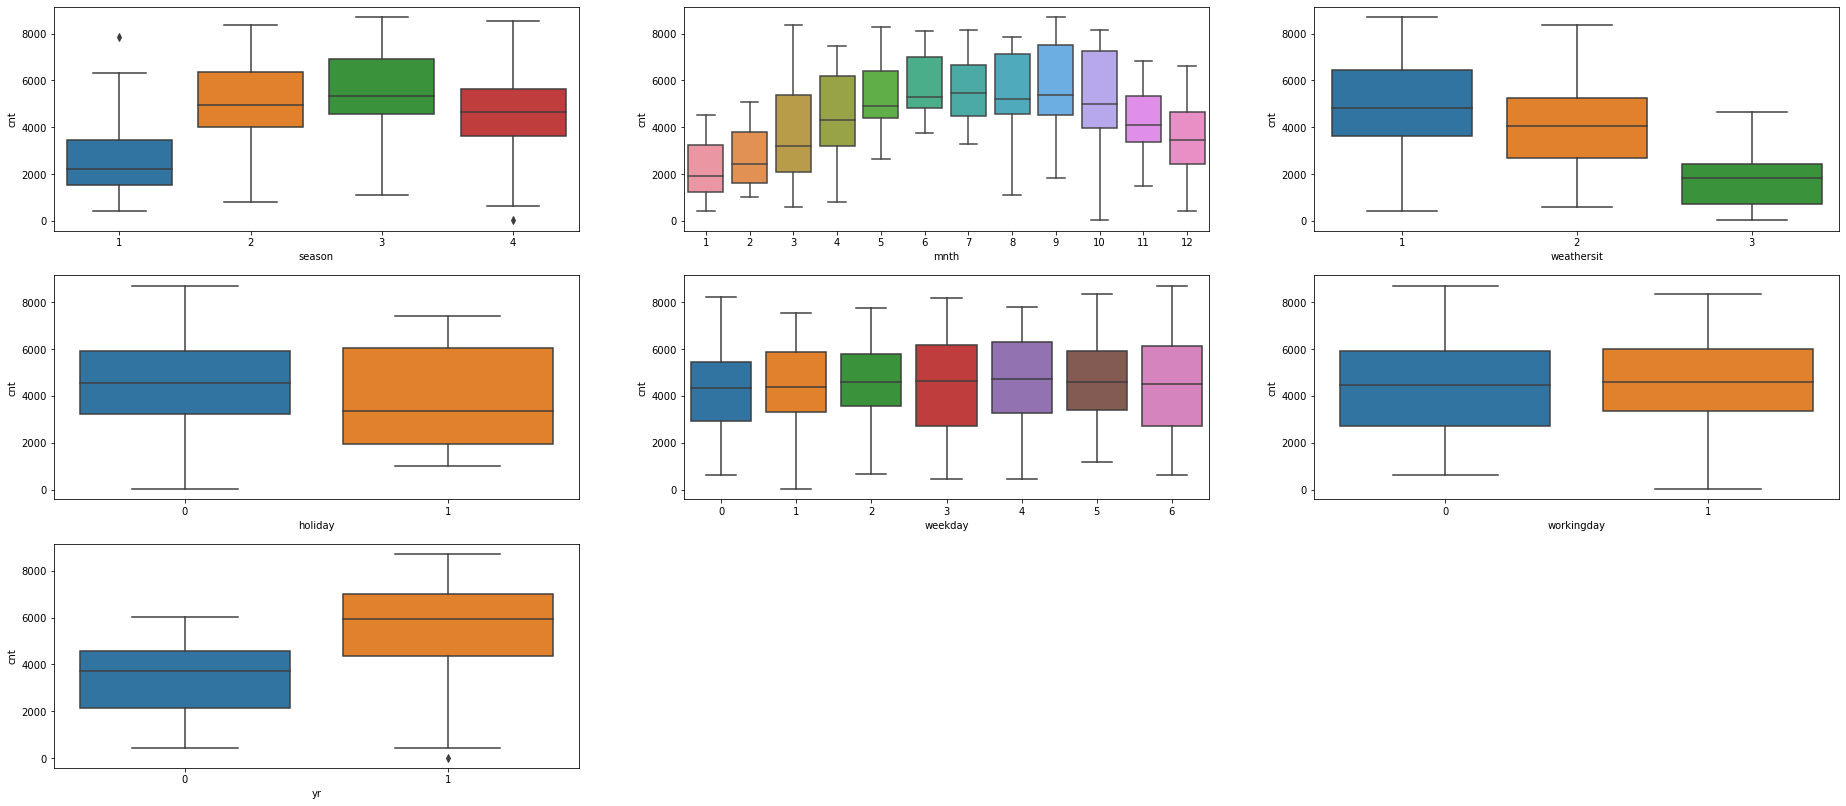

In [15]:
# Boxplot of categorical variables

plt.figure(figsize=(32, 14))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikesharing)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikesharing)
plt.subplot(3,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikesharing)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikesharing)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikesharing)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikesharing)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bikesharing)
plt.show()

## Insights:
* season: Most of the bike booking were happening in season 2 and season 3 with a median of over 5000 booking. This indicates, season can be a good predictor for the dependent variable.

* mnth: Most bike booking were happening in the months 5,6,7,8,9 & 10 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

* weathersit: Most of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking followed by weathersit2 with median above 4000 .This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.

* holiday: Most of the bike booking were happening when it is not a holiday. This indicates, holiday can't be a good predictor for the dependent variable for increasing bookings.

* weekday: weekday variable shows very close trend having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor.

* workingday: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

* yr: 2019 is clearly a better year the bike booking. This indicates it could be useful.

## Creating dummy variables

In [16]:
# Creating DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'.
# Convert to 'object' data type

bikesharing['season']=bikesharing['season'].astype('category')
bikesharing['weathersit']=bikesharing['weathersit'].astype('category')
bikesharing['mnth']=bikesharing['mnth'].astype('category')
bikesharing['weekday']=bikesharing['weekday'].astype('category')

In [17]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [18]:
# creating dummy variables for 'mnth', 'weekday', 'season' & 'weathersit'
# dropping 1st dummy variable for each
# dropping the original columns

bikesharing=pd.get_dummies(data=bikesharing,drop_first=True)

bikesharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [19]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [20]:
bikesharing.shape

(730, 30)

## Splitting the data
Train:Test in 70:30 ratio

In [21]:
# import sklearn package for data split
from sklearn.model_selection import train_test_split

# We need to specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train,df_test=train_test_split(bikesharing,train_size=0.7,test_size=0.3,random_state=1000)

In [22]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


In [23]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
544,1,0,1,34.200847,39.33065,48.8750,11.082939,5463,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
674,1,0,1,11.514153,14.07835,56.7083,11.625371,5686,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
477,1,0,1,13.188347,15.05625,76.6667,20.334232,3214,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
176,0,0,0,27.880000,31.88145,51.3333,6.333731,5305,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
655,1,0,1,21.422500,25.63125,72.8333,15.874779,7509,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0


In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 544 to 599
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

In [25]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
310,0,0,1,16.195000,20.04355,75.8750,3.834075,4035,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
320,0,0,1,14.008347,16.16105,57.5833,20.459254,3053,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
189,0,0,0,30.066653,33.20790,60.9167,11.250104,5336,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
382,1,0,1,12.436653,13.76270,44.3333,27.833743,3376,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
388,1,0,1,14.042500,17.45540,83.5833,8.292389,4339,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [26]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 310 to 460
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   cnt           219 non-null    int64  
 8   season_2      219 non-null    uint8  
 9   season_3      219 non-null    uint8  
 10  season_4      219 non-null    uint8  
 11  mnth_2        219 non-null    uint8  
 12  mnth_3        219 non-null    uint8  
 13  mnth_4        219 non-null    uint8  
 14  mnth_5        219 non-null    uint8  
 15  mnth_6        219 non-null    uint8  
 16  mnth_7        219 non-null    uint8  
 17  mnth_8        219 non-null    uint8  
 18  mnth_9        219 non-null  

## Rescaling the Features

In [27]:
# importing MinMaxScaler for rescalling 

from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

In [29]:
# Apply scaler() to all numeric variables except the 'dummy' variables
numv=['atemp', 'hum','temp','windspeed','cnt']

df_train[numv]=scaler.fit_transform(df_train[numv])

In [30]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
544,1,0,1,0.964059,0.926848,0.503649,0.294854,0.625978,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
674,1,0,1,0.240884,0.246245,0.584370,0.311545,0.651634,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
477,1,0,1,0.294252,0.272602,0.790039,0.579511,0.367234,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
176,0,0,0,0.762572,0.726076,0.528982,0.148724,0.607800,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
655,1,0,1,0.556729,0.557620,0.750536,0.442296,0.861367,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0


In [31]:
df_train.describe(include='all')

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.500000,0.025490,0.684314,0.522749,0.507177,0.650813,0.347478,0.514357,0.266667,0.250980,0.233333,0.076471,0.084314,0.084314,0.094118,0.094118,0.082353,0.082353,0.068627,0.088235,0.076471,0.080392,0.141176,0.135294,0.137255,0.143137,0.152941,0.149020,0.347059,0.027451
std,0.500491,0.157763,0.465245,0.239351,0.219530,0.145303,0.161325,0.220019,0.442651,0.434003,0.423368,0.266010,0.278131,0.278131,0.292279,0.292279,0.275172,0.275172,0.253068,0.283915,0.266010,0.272166,0.348545,0.342373,0.344454,0.350557,0.360284,0.356457,0.476502,0.163554
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.318212,0.323000,0.540738,0.232053,0.367234,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,0.522966,0.518051,0.655431,0.328844,0.513921,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.732894,0.690137,0.754508,0.435596,0.676542,1.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


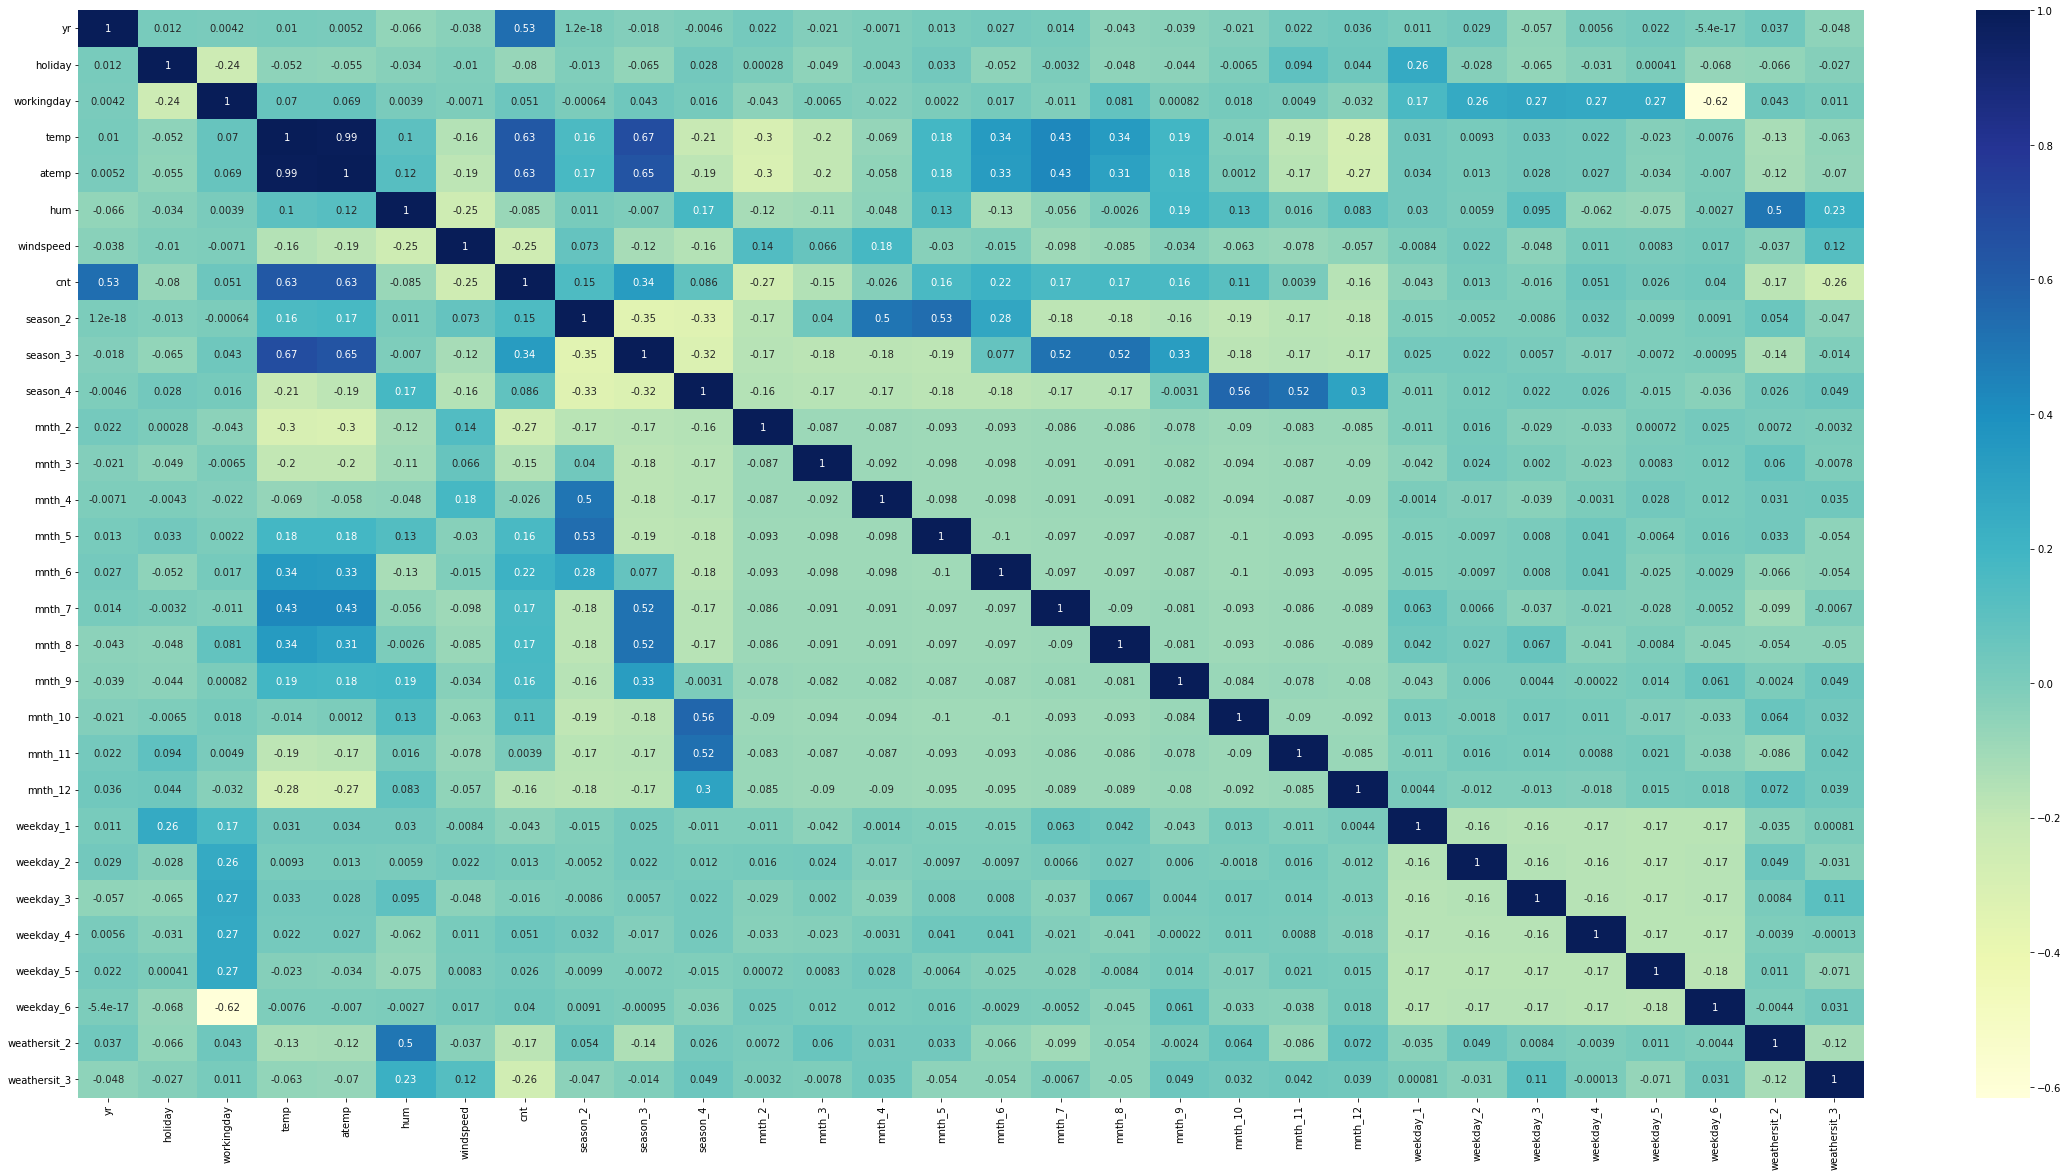

In [32]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (40, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Dividing into X and Y sets for the mode

In [33]:
y_train = df_train.pop('cnt')
X_train = df_train

In [34]:
X_train.shape

(510, 29)

In [35]:
y_train.shape

(510,)

## Using RFE and statsmodel method combined for optimum final model

In [36]:
# Using RFE method for variable selection
# Importing RFE and LinearRegression 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [37]:
# Running RFE with the output number of the variable equal to 15
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [38]:
rfe=RFE(lm,15)
rfe=rfe.fit(X_train,y_train)

In [39]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 7),
 ('temp', True, 1),
 ('atemp', False, 15),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 8),
 ('mnth_3', True, 1),
 ('mnth_4', False, 2),
 ('mnth_5', True, 1),
 ('mnth_6', False, 3),
 ('mnth_7', False, 11),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 10),
 ('mnth_12', False, 5),
 ('weekday_1', False, 6),
 ('weekday_2', False, 9),
 ('weekday_3', False, 14),
 ('weekday_4', False, 12),
 ('weekday_5', False, 13),
 ('weekday_6', False, 4),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [40]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_5', 'mnth_8', 'mnth_9', 'mnth_10',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [41]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_2', 'mnth_4', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [42]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [43]:
X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_5', 'mnth_8', 'mnth_9', 'mnth_10',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

# Building model using statsmodel, for the detailed statistics

### Model : 1

In [44]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,20.80
3,hum,15.17
6,season_3,8.14
4,windspeed,4.35
5,season_2,4.06
7,season_4,3.12
13,weathersit_2,2.21
0,yr,1.95
12,mnth_10,1.73
9,mnth_5,1.67


In [45]:
#BUILDING MODEL USING STATSMODEL:
import statsmodels.api as sm  

# Adding a constant variable 
X_train_lm1 = sm.add_constant(X_train_rfe)

In [46]:
# Running the linear model
lr1=sm.OLS(y_train,X_train_lm1).fit()

In [47]:
#Let's see the summary of our linear model
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     168.2
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          5.08e-183
Time:                        10:20:23   Log-Likelihood:                 510.44
No. Observations:                 510   AIC:                            -988.9
Df Residuals:                     494   BIC:                            -921.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2581      0.029      8.902   

* Decided to drop 'hum' due to high VIF.
* Keeping 'temp' as temperature could be an important factor for a business like bike rentals. We will check this further

## model 2:

In [48]:
X_train_rfe2 = X_train_rfe.drop(["hum"], axis = 1)

In [49]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe2.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,15.53
5,season_3,7.96
4,season_2,4.05
3,windspeed,3.62
6,season_4,2.84
0,yr,1.92
11,mnth_10,1.70
8,mnth_5,1.66
9,mnth_8,1.66
12,weathersit_2,1.52


In [50]:
# Adding a constant variable 
X_train_lm2 = sm.add_constant(X_train_rfe2)

# Running the linear model
lr2=sm.OLS(y_train,X_train_lm2).fit()

#Let's see the summary of our linear model
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     170.5
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          4.88e-179
Time:                        10:20:32   Log-Likelihood:                 498.24
No. Observations:                 510   AIC:                            -966.5
Df Residuals:                     495   BIC:                            -903.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1444      0.018      8.061   

* Decided to drop 'season_3' due to high VIF.

## Model: 3

In [51]:
X_train_rfe3=X_train_rfe2.drop(['season_3'],axis=1)

In [52]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif=pd.DataFrame()
vif['Features']=X_train_rfe3.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe3.values,i) for i in range(X_train_rfe3.shape[1])]
vif['VIF']=round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.87
3,windspeed,3.50
4,season_2,2.34
5,season_4,1.98
0,yr,1.91
10,mnth_10,1.67
7,mnth_5,1.61
11,weathersit_2,1.51
8,mnth_8,1.48
9,mnth_9,1.27


In [53]:
# Adding a constant
X_train_lm3=sm.add_constant(X_train_rfe3)

# Running the linear model
lr3=sm.OLS(y_train,X_train_lm3).fit()

# Summary
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     179.1
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          9.03e-178
Time:                        10:20:39   Log-Likelihood:                 492.51
No. Observations:                 510   AIC:                            -957.0
Df Residuals:                     496   BIC:                            -897.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1375      0.018      7.649   

* Need to drop 'mnth_5' due to high p-value

## Model:4

In [54]:
X_train_rfe4=X_train_rfe3.drop(['mnth_5'],axis=1)

In [55]:
# Checking VIF
vif=pd.DataFrame()
vif['Features']=X_train_rfe4.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe4.values,i) for i in range(X_train_rfe4.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif

,Features,VIF
0,yr,1.91
1,holiday,1.03
2,temp,4.80
3,windspeed,3.47
4,season_2,1.85
5,season_4,1.98
6,mnth_3,1.14
7,mnth_8,1.48
8,mnth_9,1.27
9,mnth_10,1.67


In [56]:
# adding constant
X_train_lm4=sm.add_constant(X_train_rfe4)

# fiiting and running the model
lr4=sm.OLS(y_train,X_train_lm4).fit()

# Summary
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     193.7
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          1.28e-178
Time:                        10:20:45   Log-Likelihood:                 491.79
No. Observations:                 510   AIC:                            -957.6
Df Residuals:                     497   BIC:                            -902.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1373      0.018      7.637   

* Need to drop 'mnth_3' due to high p-value

## Model 5

In [57]:
X_train_rfe5=X_train_rfe4.drop(['mnth_3'],axis=1)

In [58]:
# Checking VIF
vif=pd.DataFrame()
vif['Features']=X_train_rfe5.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe5.values,i) for i in range(X_train_rfe5.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif

,Features,VIF
0,yr,1.91
1,holiday,1.03
2,temp,4.79
3,windspeed,3.33
4,season_2,1.85
5,season_4,1.95
6,mnth_8,1.47
7,mnth_9,1.26
8,mnth_10,1.67
9,weathersit_2,1.50


In [59]:
# adding constant
X_train_lm5=sm.add_constant(X_train_rfe5)

# fitting and running model
lr5=sm.OLS(y_train,X_train_lm5).fit()

# summary
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     209.9
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          5.01e-179
Time:                        10:20:51   Log-Likelihood:                 489.97
No. Observations:                 510   AIC:                            -955.9
Df Residuals:                     498   BIC:                            -905.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1454      0.018      8.308   

*  Need to drop 'mnth_10' due to high p-value

## Model :6

In [60]:
X_train_rfe6=X_train_rfe5.drop(['mnth_10'],axis=1)

In [61]:
# Checking VIF
vif=pd.DataFrame()
vif['Features']=X_train_rfe6.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe6.values,i) for i in range(X_train_rfe6.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif

,Features,VIF
0,yr,1.90
1,holiday,1.03
2,temp,4.69
3,windspeed,3.32
4,season_2,1.83
5,season_4,1.40
6,mnth_8,1.46
7,mnth_9,1.23
8,weathersit_2,1.49
9,weathersit_3,1.07


In [62]:
# adding constant
X_train_lm6=sm.add_constant(X_train_rfe6)

# fitting and running model
lr6=sm.OLS(y_train,X_train_lm6).fit()

# summary
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     228.4
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          4.31e-179
Time:                        10:20:56   Log-Likelihood:                 487.31
No. Observations:                 510   AIC:                            -952.6
Df Residuals:                     499   BIC:                            -906.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1401      0.017      8.041   

* Need to drop 'mnth_8' due to high p-value

## Model :7

In [63]:
X_train_rfe7=X_train_rfe6.drop(['mnth_8'],axis=1)

In [64]:
# Checking VIF
vif=pd.DataFrame()
vif['Features']=X_train_rfe7.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe7.values,i) for i in range(X_train_rfe7.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif

,Features,VIF
0,yr,1.89
1,holiday,1.03
2,temp,3.56
3,windspeed,3.31
4,season_2,1.61
5,season_4,1.33
6,mnth_9,1.17
7,weathersit_2,1.49
8,weathersit_3,1.07


In [65]:
# adding constant
X_train_lm7=sm.add_constant(X_train_rfe7)

# fitting and running model
lr7=sm.OLS(y_train,X_train_lm7).fit()

# summary
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     249.7
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          1.14e-178
Time:                        10:21:04   Log-Likelihood:                 483.45
No. Observations:                 510   AIC:                            -946.9
Df Residuals:                     500   BIC:                            -904.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1397      0.018      7.964   

## Insights:
* The Model 7 looks pretty decent with p-values significant and very low multicollinearity between the predictor variables.

* The R-squared and Adj. R-squared looks very good at 0.818 and 0.815 respectively.
* F-static is also large, stating a good fit of model.

* We will check the test data metrics to check whether this model is significant enough or not.

# Residual Analysis of the train data

* Error terms are normally distributed with mean zero.

In [66]:
y_train_cnt = lr7.predict(X_train_lm7)

Text(0.5, 0, 'Errors')

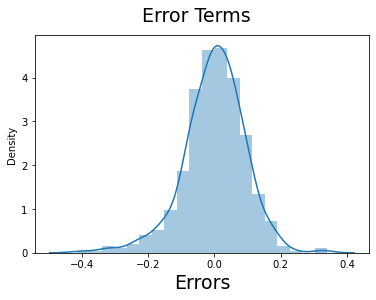

In [67]:
res = y_train-y_train_cnt

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 19)                  # Plot heading 
plt.xlabel('Errors', fontsize = 19)   

## Insights:
* From the plot, we could see that residuals are normally distributed and hence, our assumption for linear regression is valid

# Making Predictions Using the Final Model

* Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr7)

In [68]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

numv = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[numv] = scaler.transform(df_test[numv])

In [69]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
310,0,0,1,0.303293,0.206546,2.292490,0.071811,0.461689,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
320,0,0,1,0.244358,0.166537,1.709413,0.583358,0.348711,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
189,0,0,0,0.677164,0.342202,1.815670,0.299998,0.611367,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
382,1,0,1,0.201998,0.141823,1.287047,0.810267,0.385872,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
388,1,0,1,0.245279,0.179875,2.538205,0.208991,0.496664,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [70]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.497717,0.036530,0.680365,0.412258,0.243731,1.847594,0.344287,0.519768,0.219178,0.273973,0.269406,0.077626,0.082192,0.077626,0.063927,0.054795,0.091324,0.091324,0.114155,0.077626,0.095890,0.095890,0.146119,0.159817,0.150685,0.141553,0.118721,0.132420,0.315068,0.031963
std,0.501140,0.188034,0.467403,0.203098,0.084487,0.463782,0.157137,0.229815,0.414637,0.447017,0.444668,0.268194,0.275286,0.268194,0.245183,0.228100,0.288730,0.288730,0.318728,0.268194,0.295115,0.295115,0.354034,0.367276,0.358561,0.349389,0.324202,0.339723,0.465607,0.176306
min,0.000000,0.000000,0.000000,-0.067855,0.040740,0.684050,0.047450,0.069604,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.236531,0.169462,1.487787,0.230151,0.345950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.425768,0.253718,1.797073,0.320521,0.530028,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.583696,0.312116,2.159007,0.433733,0.699896,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.805164,0.414403,2.973853,0.864144,0.959503,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 310 to 460
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  mnth_2        219 non-null    uint8  
 11  mnth_3        219 non-null    uint8  
 12  mnth_4        219 non-null    uint8  
 13  mnth_5        219 non-null    uint8  
 14  mnth_6        219 non-null    uint8  
 15  mnth_7        219 non-null    uint8  
 16  mnth_8        219 non-null    uint8  
 17  mnth_9        219 non-null    uint8  
 18  mnth_10       219 non-null  

In [72]:
y_test

310    0.461689
320    0.348711
189    0.611367
382    0.385872
388    0.496664
         ...   
436    0.670156
657    0.928210
606    0.884837
417    0.546595
460    0.740681
Name: cnt, Length: 219, dtype: float64

In [73]:
#Selecting the variables that were part of final model.
col_1=X_train_rfe7.columns
X_test=X_test[col_1]
# Adding constant variable to test dataframe
X_test_lm7 = sm.add_constant(X_test)
X_test_lm7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 310 to 460
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   holiday       219 non-null    int64  
 3   temp          219 non-null    float64
 4   windspeed     219 non-null    float64
 5   season_2      219 non-null    uint8  
 6   season_4      219 non-null    uint8  
 7   mnth_9        219 non-null    uint8  
 8   weathersit_2  219 non-null    uint8  
 9   weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(5)
memory usage: 11.3 KB


In [74]:
# Making predictions using the final model (lr9)

y_pred = lr7.predict(X_test_lm7)

# Model Evaluation

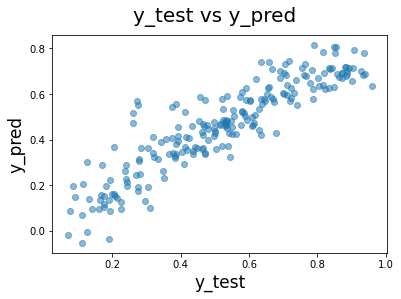

In [75]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.52)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 17)                          # X-label
plt.ylabel('y_pred', fontsize = 17) 
plt.show()

## R-Squared value Test

In [76]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
r2

0.7503777292092293

## Adjusted R-Squared value Test

In [77]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.73962844482111

# Final model equation

cnt = 0.1397 + (yr × 0.2294) - (holiday x 0.1049) + (temp × 0.5309) − (windspeed × 0.1169) + (season_2 × 0.0834) + (season_4 × 0.1412) + (mnth_9 × 0.0923) - (weathersit_2 × 0.0793) - (weathersit_3 × 0.2993)

# All predictor variables:
* yr

* holiday

* temp

* windspeed

* season_2

* season_4

* mnth_9

* weathersit_2

* weathersit_3

# NOTE:
* yr : year
* temp : temperature
* mnth_9 : september
* weathersit_3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light  Rain + Scattered clouds
* season_2: spring
* season_4: winter

## Top 3 most important predictor variables:
* Temperature (temp) - A coefficient value of ‘0.5309’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.5309 units.


* Year (yr) - A coefficient value of ‘0.2294’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2294 units.


* Weather Situation 3 (weathersit_3) - A coefficient value of ‘-0.2993’ indicated that, a unit increase in weathersit_3 variable decreases the bike hire numbers by 0.2993 units.

# Other important predictor variables to watchout for:
* season_4: - A coefficient value of ‘0.1412’ indicated a unit increase in season_4 variable increases the bike hire numbers by 0.1412 units.

* windspeed: - A coefficient value of ‘-0.1169’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.1169 units.